<a href="https://colab.research.google.com/github/hamidsadeghi68/face-clustering/blob/main/arcface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**install packages** for google colab

In [ ]:
!pip install -U insightface

import torch
if torch.cuda.is_available():
  print('gpu is available')
  !pip install onnxruntime-gpu==1.9.0  # to use GPU
else:
  print('gpu is not available')
  !pip install onnxruntime

gpu is available


**download sample images** from my github page

In [ ]:
!mkdir sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg -P sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid2.jpeg -P sample_images
!wget https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/Zidane.jpg -P sample_images

mkdir: cannot create directory ‘sample_images’: File exists
--2021-12-15 06:49:04--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/hamid1.jpeg
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg [following]
--2021-12-15 06:49:05--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/hamid1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28125 (27K) [image/jpeg]
Saving to: ‘sample_images/hamid1.jpeg.1’

hamid1.jpeg.1       100%[===================>]  27.47K  --.-KB/s    in 0s 

**prepare models**

Here I used default model. You can select the best *Face Detection* and *Face Recognition* models (trade-off between accuracy and computational cost) on [model-zoo page](https://github.com/deepinsight/insightface/tree/8137469a08a00ddf9a4de4f15f5e98b2869ced21/model_zoo#insightface-model-zoo)

> *more accurate* <===================================================> *faster*

> ResNet-100 (*R100*) - ResNet-50 (*R50*) - ResNet-34 (*R34*) - ResNet-18 (*R18*) - *MobileNet*





In [ ]:
from insightface.app import FaceAnalysis

app = FaceAnalysis()
app.prepare(ctx_id=0, det_thresh=0.5)

/usr/local/lib/python3.7/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:353: UserWarning: Deprecation warning. This ORT build has ['CUDAExecutionProvider', 'CPUExecutionProvider'] enabled. The next release (ORT 1.10) will require explicitly setting the providers parameter (as opposed to the current behavior of providers getting set/registered by default based on the build flags) when instantiating InferenceSession.For example, onnxruntime.InferenceSession(..., providers=["CUDAExecutionProvider"], ...)
  "based on the build flags) when instantiating InferenceSession."


Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'cudnn_conv_use_max_workspace': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_alloc': '0', 'device_id': '0'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'do_copy_in_default_stream': '1', 'arena_extend_strategy': 'kNextPowerOfTwo', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'cudnn_conv_use_max_workspace': '0', 'gpu_mem_limit': '18446744073709551615', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_alloc': '0', 'device_id': '0'}}
find model: /ro

run insightface

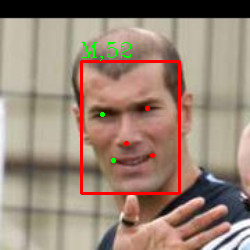

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('sample_images/Zidane.jpg')
faces = app.get(img)

# show result:
rimg = app.draw_on(img, faces)
cv2_imshow(rimg)

In [ ]:
for key, vlaue in faces[0].items():
  print(key)

for face in faces:
  print(face['det_score'])

bbox
kps
det_score
landmark_3d_68
landmark_2d_106
gender
age
embedding
0.8209862


Remove unnecessary processes, such as landmark detection and gender recognition, to reduce run time.

in [face_analysis.py](https://github.com/deepinsight/insightface/blob/8137469a08a00ddf9a4de4f15f5e98b2869ced21/python-package/insightface/app/face_analysis.py#L73) (/usr/local/lib/python3.7/dist-packages/insightface/app/face_analysis.py) see: "taskname, model in self.models.items():"
*   'landmark_3d_68'
*   'landmark_2d_106'
*   'genderage'
*   'recognition'
*   'detection'

Moreover, feature (embedding) extraction can be perfomed only for the best face ([facecup](https://facecup.ir/) images are single face).

**face comparison (verification)**

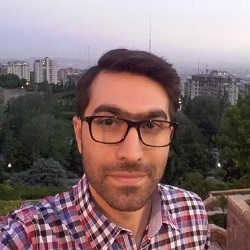
  **vs**  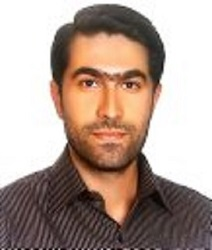
  **vs**  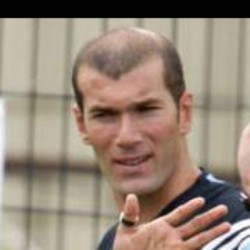

In [ ]:
def feature_extraction(img_path):
  img = cv2.imread(img_path)
  faces = app.get(img)
  return(faces[0].normed_embedding)

In [ ]:
!wget https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/matching.py
from matching import match

--2021-12-15 06:49:20--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/matching.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 548 [text/plain]
Saving to: ‘matching.py’

matching.py         100%[===================>]     548  --.-KB/s    in 0s      

2021-12-15 06:49:20 (23.3 MB/s) - ‘matching.py’ saved [548/548]



In [ ]:
template1 = feature_extraction("sample_images/hamid1.jpeg")
template2 = feature_extraction("sample_images/hamid2.jpeg")
template3 = feature_extraction("sample_images/Zidane.jpg")

print('\033[1m' + 'similarity:' + '\033[0m') # '\033[1m' is used for bold
similarity = match(template1, template2, metric='Cosine')
print('\033[94m' + 'hamid1 vs hamid2 = %f'%(similarity) + '\033[0m') # '\033[94m' is used for blue color
similarity = match(template1, template3, metric='Cosine')
print('\033[91m' + 'hamid1 vs Zidane = %f'%(similarity) + '\033[0m') # '\033[91m' is used for red color
similarity = match(template2, template3, metric='Cosine')
print('\033[91m' + 'hamid2 vs Zidane = %f'%(similarity) + '\033[0m')

print('\033[1m' + '\ndistance:' + '\033[0m')
distance = match(template1, template2, metric='Euclidean')
print('\033[94m' + 'hamid1 vs hamid2 = %f'%(distance) + '\033[0m')
distance = match(template1, template3, metric='Euclidean')
print('\033[91m' + 'hamid1 vs Zidane = %f'%(distance) + '\033[0m')
distance = match(template2, template3, metric='Euclidean')
print('\033[91m' + 'hamid2 vs Zidane = %f'%(distance) + '\033[0m')

similarity:
hamid1 vs hamid2 = 0.707866
hamid1 vs Zidane = 0.107682
hamid2 vs Zidane = 0.067385

distance:
hamid1 vs hamid2 = 0.764374
hamid1 vs Zidane = 1.335903
hamid2 vs Zidane = 1.365734


**references**:

https://github.com/deepinsight/insightface (specially https://github.com/deepinsight/insightface/tree/master/python-package)